In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib
import random as rd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

In [2]:
import itertools as it

In [3]:
def count_permutationlist(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(len(df)-d+1):
        slice_df = df[i:i+d]
        sort_slice = sorted(slice_df)
        for j in range(d):
            slice_df[slice_df.index(sort_slice[j])] = j
        count_p[perm.index(tuple(slice_df))] += 1
    return count_p
def count_permutation(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(df.size-d+1):
        slice_df = df.iloc[i:i+d]
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            #print(slice_df[slice_df==sort_slice.iloc[j]])
            slice_df.replace(slice_df[slice_df==sort_slice.iloc[j]].item(), j, inplace = True)
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p

In [4]:
def fun(X, alp: float, beta: float, max_kf: float, trend: float, season: float):
    j = 2
    k = 2
    for i in X[2:]:
        X[i] = (alp * X[i-dt.timedelta(1/24)] + beta * X[i-dt.timedelta(2/24)]) + rd.uniform(-max_kf, max_kf) + trend * j
        if k%(7*24)==0:
            X[i]+=season
        if k%(7*24)==1:
            X[i]-=season
        k+=1
    return X

In [5]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0

<AxesSubplot:>

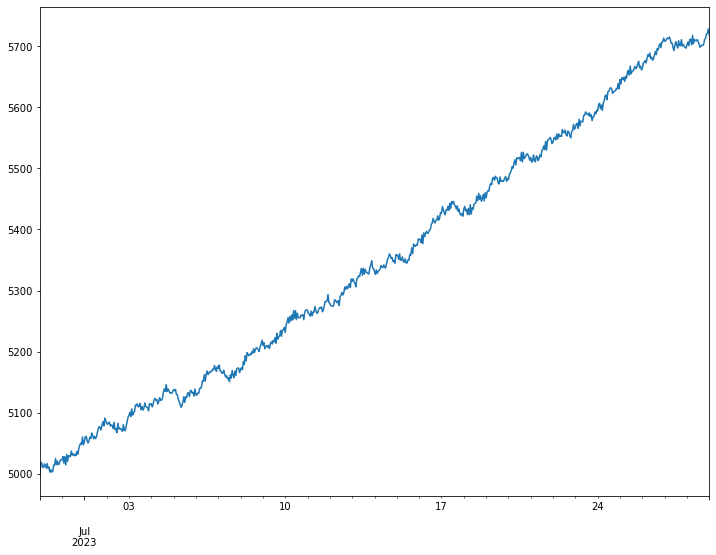

In [6]:
ts = fun(datelist.copy(), 0.4501, 0.5483, 10, 5, 0)
ts.plot(figsize=(12,9))

In [7]:
c = count_permutation(ts.copy(), 2)
c

[458, 262]

In [8]:
c1 = count_permutation(ts.copy(), 3)
c1

[176, 193, 136, 54, 110, 50]

In [9]:
def entropy(perm:list):
    allperm = sum(c1)
    ent = 0
    for i in range(len(perm)):
        probability = perm[i]/allperm
        if probability !=0:
            ent -= probability * math.log2(probability)
    return ent

In [10]:
print("max entropy: ", math.log2(2))
entropy(c)


max entropy:  1.0


0.9451715857650655

In [11]:
print("max entropy: ", math.log2(6))
entropy(c1)

max entropy:  2.584962500721156


2.423081030569721

In [12]:
# for d in range(2,11):
#     print("len of slice: ", d)
#     c = count_permutation(ts.copy(), d)
#     print("max entropy: ", math.log2(math.factorial(d)))
#     print(entropy(c))

len of slice:  2
max entropy:  1.0
0.9451715857650655
len of slice:  3
max entropy:  2.584962500721156
2.423081030569721
len of slice:  4
max entropy:  4.584962500721156
4.306470141561677
len of slice:  5
max entropy:  6.906890595608519
6.348766848654467
len of slice:  6
max entropy:  9.491853096329674
8.059708552507944
len of slice:  7
max entropy:  12.29920801838728
8.943664535714941
len of slice:  8
max entropy:  15.29920801838728
9.304925825798705
len of slice:  9
max entropy:  18.46913301982959
9.391184416958485
len of slice:  10
max entropy:  21.791061114716953
9.38911230574786


In [13]:
ts2 = ts['15/07/2023 00:00:00':]

In [14]:
# for d in range(2,11):
#     print("len of slice: ", d)
#     c = count_permutation(ts2.copy(), d)
#     print("max entropy: ", math.log2(math.factorial(d)))
#     print(entropy(c))

len of slice:  2
max entropy:  1.0
0.9511112426057118
len of slice:  3
max entropy:  2.584962500721156
1.6368499152707434
len of slice:  4
max entropy:  4.584962500721156
2.484083698529085
len of slice:  5
max entropy:  6.906890595608519
3.3439023686604474
len of slice:  6
max entropy:  9.491853096329674
3.9476514756731045
len of slice:  7
max entropy:  12.29920801838728
4.215578177215541
len of slice:  8
max entropy:  15.29920801838728
4.3044435875421225
len of slice:  9
max entropy:  18.46913301982959
4.328456159922823
len of slice:  10
max entropy:  21.791061114716953
4.323602407543908


721


<AxesSubplot:>

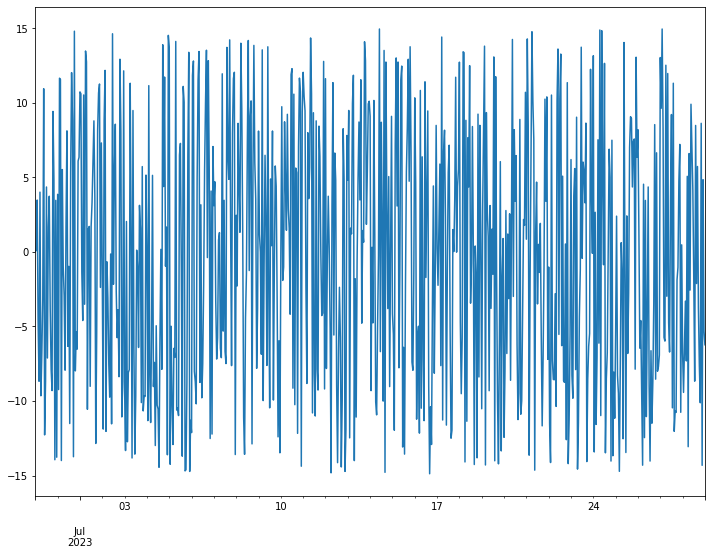

In [15]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
print(datelist.size)
datelist['29/06/2023 00:00:00'] = 0.05
datelist['29/06/2023 01:00:00'] = 0.1
noise = fun(datelist.copy(), 0, 0, 15, 0, 0)

noise.plot(figsize=(12,9))

In [16]:
k = []
for i in range(721):
    k.append(rd.uniform(-10, 10))

In [17]:
noise = noise.apply(float)
noise = pd.Series(k, index=datelist.index)
noise

2023-06-29 00:00:00   -9.851910
2023-06-29 01:00:00    6.249840
2023-06-29 02:00:00    0.596899
2023-06-29 03:00:00    0.066415
2023-06-29 04:00:00    8.396485
                         ...   
2023-07-28 20:00:00    4.942920
2023-07-28 21:00:00    6.125146
2023-07-28 22:00:00    5.426114
2023-07-28 23:00:00   -0.166884
2023-07-29 00:00:00   -5.253802
Length: 721, dtype: float64

<AxesSubplot:>

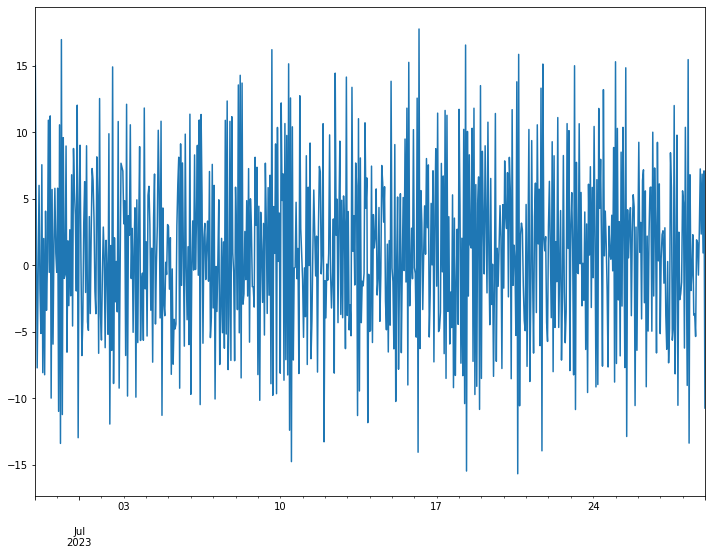

In [18]:
tsdiff = ts.diff(periods=1).dropna()
tsdiff.plot(figsize=(12,9))

In [21]:
for d in range(2,11):
    print("len of slice: ", d)
    c = count_permutationlist(k.copy(), d)
    c1 = count_permutation(ts.copy(), d)
    c2 = count_permutationlist(tsdiff.copy().to_list(), d)
    
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c))
    print("ts entropy: ", entropy(c1))
    print("tsdiff entropy: ", entropy(c2))

len of slice:  2
max entropy:  1.0
noise entropy:  0.999799616411146
ts entropy:  0.9458639833418798
tsdiff entropy:  1.0006120686664968
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.583869592266357
ts entropy:  2.423081030569721
tsdiff entropy:  2.537441204697985
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.575002894938312
ts entropy:  4.310460084223371
tsdiff entropy:  4.382619106395838
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.816842615575678
ts entropy:  6.362457448935638
tsdiff entropy:  6.485599516304127
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.71006595673181
ts entropy:  8.087446097904825
tsdiff entropy:  8.279649087827945
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.38004434425025
ts entropy:  8.985650493854637
tsdiff entropy:  9.19889623313279
len of slice:  8
max entropy:  15.29920801838728
noise entropy:  9.468575782236487
ts entropy:  9.360018674387284
tsdiff 

In [ ]:
second_ts = fun(datelist.copy(), 0.4501, 0.5483, 1, 5, 0)
second_ts.plot(figsize=(12,9))

In [ ]:
for d in range(2,11):
    print("len of slice: ", d)
    c = count_permutation(second_ts.copy(), d)
    print("max entropy: ", math.log2(math.factorial(d)))
    print(entropy(c))